https://yenpa.tistory.com/66

In [14]:
!pip install fredpy
!pip install matplotlib
!pip install pandas
!pip install statsmodels 
!pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 68.9 MB/s eta 0:00:00:00:0100:01


In [7]:
import pandas as pd
import fredpy as fp
fp.api_key = 'c07833f8777965523172c320056fe311'

In [8]:
enddate='2023-11-23'
u = fp.series('UNRATE',enddate)

In [23]:
u.data

date
1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2023-06-01    3.6
2023-07-01    3.5
2023-08-01    3.8
2023-09-01    3.8
2023-10-01    3.9
Freq: MS, Name: value, Length: 910, dtype: float64

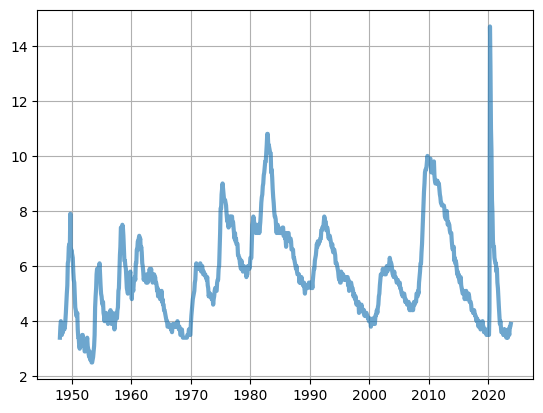

In [25]:
import matplotlib.pyplot as plt
plt.plot_date(u.data.index,u.data.values,'-',lw=3,alpha = 0.65)
plt.grid()

In [26]:
print(type(u))
u.data

<class 'fredpy.series'>


date
1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2023-06-01    3.6
2023-07-01    3.5
2023-08-01    3.8
2023-09-01    3.8
2023-10-01    3.9
Freq: MS, Name: value, Length: 910, dtype: float64

In [10]:
usreg = fp.series('USREC',enddate)
usreg.data

date
1854-12-01    1.0
1855-01-01    0.0
1855-02-01    0.0
1855-03-01    0.0
1855-04-01    0.0
             ... 
2023-06-01    0.0
2023-07-01    0.0
2023-08-01    0.0
2023-09-01    0.0
2023-10-01    0.0
Freq: MS, Name: value, Length: 2027, dtype: float64

In [11]:
udata=u.data.loc[u.data.index>='1980-01-01']
udata

date
1980-01-01    6.3
1980-02-01    6.3
1980-03-01    6.3
1980-04-01    6.9
1980-05-01    7.5
             ... 
2023-06-01    3.6
2023-07-01    3.5
2023-08-01    3.8
2023-09-01    3.8
2023-10-01    3.9
Freq: MS, Name: value, Length: 526, dtype: float64

In [12]:
usregdata=usreg.data.loc[usreg.data.index>='1980-01-01']
usregdata

date
1980-01-01    0.0
1980-02-01    1.0
1980-03-01    1.0
1980-04-01    1.0
1980-05-01    1.0
             ... 
2023-06-01    0.0
2023-07-01    0.0
2023-08-01    0.0
2023-09-01    0.0
2023-10-01    0.0
Freq: MS, Name: value, Length: 526, dtype: float64

In [27]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

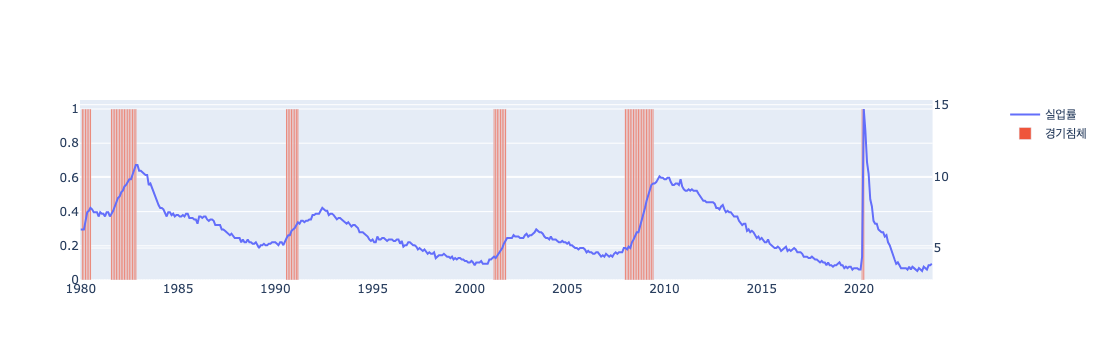

In [28]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Line(x=udata.index, y=udata.values, name="실업률"),
    secondary_y=True,
)

fig.add_trace(
    go.Bar(x=usregdata.index, y=usregdata.values, name="경기침체"),
    secondary_y=False,
)

fig.show()